## 1. Import Required Libraries

In [491]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### 2. import Data

In [638]:
weather_data = pd.read_csv("C:/Users/mites/Downloads/Rainier_Weather.csv")

In [639]:
climbing_data = pd.read_csv("C:/Users/mites/Downloads/climbing_statistics.csv")

### 3. Data understanding

In [640]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   464 non-null    object 
 1   Battery Voltage AVG    464 non-null    float64
 2   Temperature AVG        464 non-null    float64
 3   Relative Humidity AVG  464 non-null    float64
 4   Wind Speed Daily AVG   464 non-null    float64
 5   Wind Direction AVG     464 non-null    float64
 6   Solare Radiation AVG   464 non-null    float64
dtypes: float64(6), object(1)
memory usage: 25.5+ KB


In [641]:
climbing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4077 non-null   object 
 1   Route               4077 non-null   object 
 2   Attempted           4077 non-null   int64  
 3   Succeeded           4077 non-null   int64  
 4   Success Percentage  4077 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 159.4+ KB


In [642]:
weather_data.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


In [643]:
weather_data.shape

(464, 7)

In [644]:
weather_data.dtypes

Date                      object
Battery Voltage AVG      float64
Temperature AVG          float64
Relative Humidity AVG    float64
Wind Speed Daily AVG     float64
Wind Direction AVG       float64
Solare Radiation AVG     float64
dtype: object

In [645]:
climbing_data.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


In [646]:
climbing_data.shape

(4077, 5)

In [647]:
climbing_data.dtypes

Date                   object
Route                  object
Attempted               int64
Succeeded               int64
Success Percentage    float64
dtype: object

#### 3.1 Mergin the Data

In [648]:
df = weather_data.merge(climbing_data,on="Date")
df.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,Disappointment Cleaver,2,0,0.0
1,11/21/2015,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,Disappointment Cleaver,3,0,0.0
2,10/15/2015,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,Disappointment Cleaver,2,0,0.0
3,10/13/2015,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,Little Tahoma,8,0,0.0
4,10/9/2015,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,Disappointment Cleaver,2,0,0.0


In [649]:
df.isna().sum()

Date                     0
Battery Voltage AVG      0
Temperature AVG          0
Relative Humidity AVG    0
Wind Speed Daily AVG     0
Wind Direction AVG       0
Solare Radiation AVG     0
Route                    0
Attempted                0
Succeeded                0
Success Percentage       0
dtype: int64

In [650]:
df.dtypes

Date                      object
Battery Voltage AVG      float64
Temperature AVG          float64
Relative Humidity AVG    float64
Wind Speed Daily AVG     float64
Wind Direction AVG       float64
Solare Radiation AVG     float64
Route                     object
Attempted                  int64
Succeeded                  int64
Success Percentage       float64
dtype: object

### 4. Data Preparation

#### 4.1 Change Date DataType to datetime

In [651]:
df["Date"] = pd.to_datetime(df["Date"])

#### 4.2 Drop columns that not required

In [652]:
df.drop(labels=["Attempted","Succeeded"],axis=1,inplace=True)

In [653]:
df.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Route,Success Percentage
0,2015-11-27,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,Disappointment Cleaver,0.0
1,2015-11-21,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,Disappointment Cleaver,0.0
2,2015-10-15,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,Disappointment Cleaver,0.0
3,2015-10-13,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,Little Tahoma,0.0
4,2015-10-09,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,Disappointment Cleaver,0.0


#### 4.3 Create month column from Date 

In [654]:
df["Month"] = df["Date"].dt.month

In [655]:
df.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Route,Success Percentage,Month
0,2015-11-27,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,Disappointment Cleaver,0.0,11
1,2015-11-21,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,Disappointment Cleaver,0.0,11
2,2015-10-15,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,Disappointment Cleaver,0.0,10
3,2015-10-13,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,Little Tahoma,0.0,10
4,2015-10-09,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,Disappointment Cleaver,0.0,10


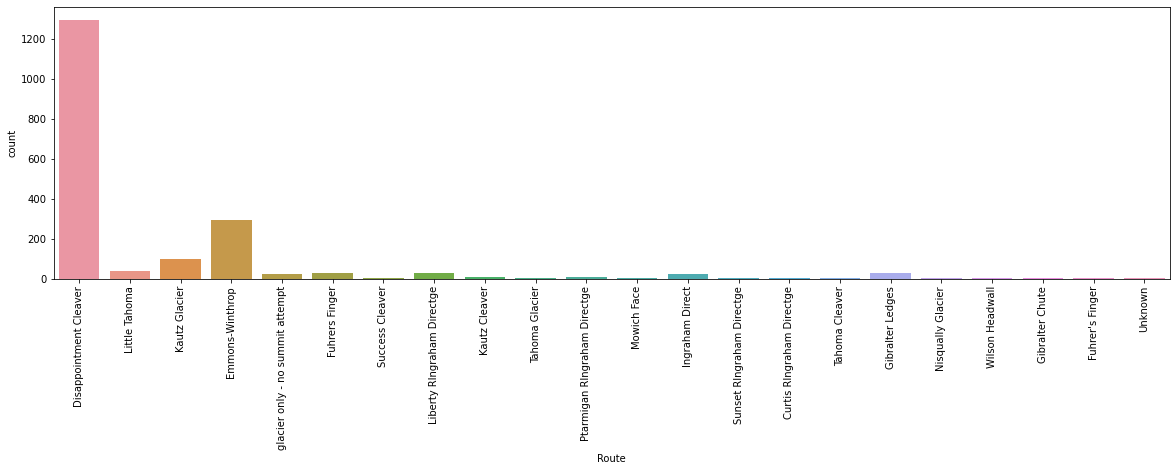

In [656]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["Route"])
plt.xticks(rotation=90)
plt.show()

#### 4.4 Check Outliers

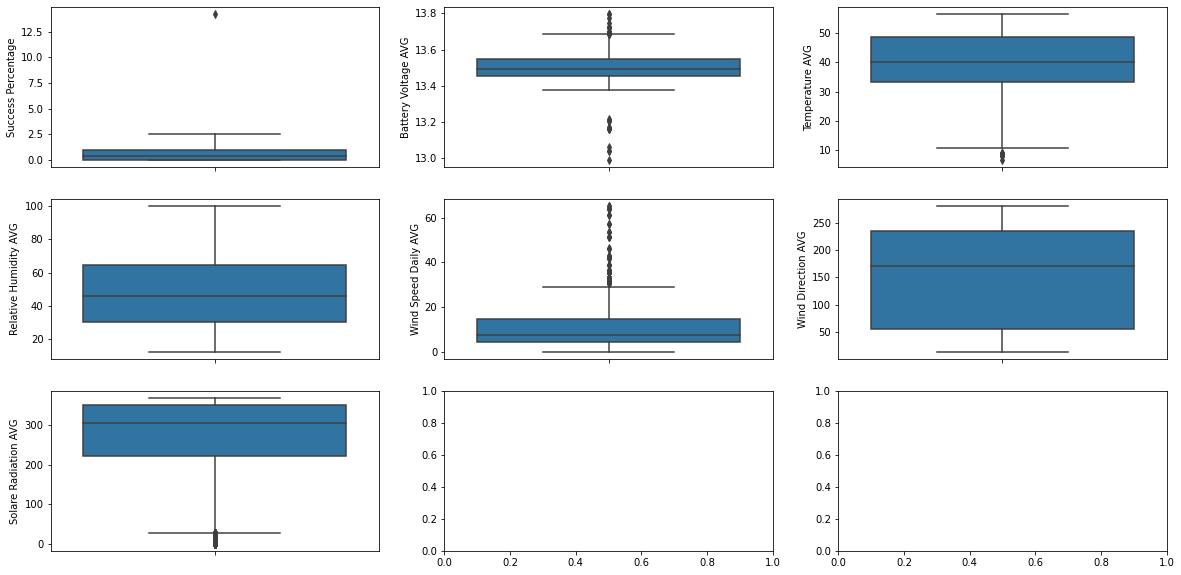

In [657]:
fig, ax =  plt.subplots(3,3,figsize=(20,10))
sns.boxplot(y=df["Success Percentage"],ax=ax[0,0])
sns.boxplot(y=df["Battery Voltage AVG"],ax=ax[0,1])
sns.boxplot(y=df["Temperature AVG"],ax=ax[0,2])
sns.boxplot(y=df["Relative Humidity AVG"],ax=ax[1,0])
sns.boxplot(y=df["Wind Speed Daily AVG"],ax=ax[1,1])
sns.boxplot(y=df["Wind Direction AVG"],ax=ax[1,2])
sns.boxplot(y=df["Solare Radiation AVG"],ax=ax[2,0])
plt.show()

#### 4.5 Drop outliers

In [658]:
df[df["Success Percentage"]>1].index
df.drop(index=df[df["Success Percentage"]>1].index,inplace=True)

In [659]:
df.describe()

,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Success Percentage,Month
count,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000
mean,13.502626,40.710507,47.869871,10.488669,155.508006,261.448846,0.450365,6.601906
std,0.070525,9.114892,22.157661,9.141712,91.095224,110.563545,0.457832,1.406822
min,12.987917,6.834833,12.363500,0.000000,13.490000,0.000000,0.000000,1.000000
25%,13.453333,33.376667,30.057083,4.410292,55.200917,220.184875,0.000000,6.000000
50%,13.491250,40.049167,46.140417,7.274917,171.633375,304.605708,0.416667,7.000000
75%,13.546250,48.628750,65.174167,14.657875,235.496667,351.973292,1.000000,7.000000
max,13.794583,56.153750,100.000000,65.138333,280.383333,368.056083,1.000000,12.000000


In [660]:
df["Battery Voltage AVG"].mean() - 3*df["Battery Voltage AVG"].std() , df["Battery Voltage AVG"].mean() + 3*df["Battery Voltage AVG"].std()

(13.291052099969358, 13.714199585451512)

In [661]:
df[(df["Battery Voltage AVG"]>=13.291287342530353) & (df["Battery Voltage AVG"]<=13.713989491464378)].shape

(1871, 10)

In [662]:
df["Temperature AVG"].mean() - 3*df["Temperature AVG"].std() , df["Temperature AVG"].mean() + 3*df["Temperature AVG"].std()

(13.3658317240411, 68.05518239884935)

In [663]:
df["Wind Speed Daily AVG"].mean() - 3*df["Wind Speed Daily AVG"].std() , df["Wind Speed Daily AVG"].mean() + 3*df["Wind Speed Daily AVG"].std()

(-16.936468830361086, 37.913806082198036)

In [664]:
df["Solare Radiation AVG"].mean() - 3*df["Solare Radiation AVG"].std() , df["Solare Radiation AVG"].mean() + 3*df["Solare Radiation AVG"].std()

(-70.24179074598669, 593.1394820281719)

In [665]:
df[df["Success Percentage"]>1].index
df.drop(index=df[df["Success Percentage"]>1].index,inplace=True)

In [666]:
df["Wind Speed Daily AVG"] = df["Wind Speed Daily AVG"].apply(lambda x : 0.753458 if x == 0 else x)
df["Wind Speed Daily AVG"] = df["Wind Speed Daily AVG"].apply(lambda x : 37.913806 if x >= 37.913806 else x)

In [669]:
df["Solare Radiation AVG"] = df["Solare Radiation AVG"].apply(lambda x : 593.139482 if x >= 593.139482 else x)
df["Battery Voltage AVG"] = df["Battery Voltage AVG"].apply(lambda x : 13.714199 if x >= 13.714199 else x)
df["Battery Voltage AVG"] = df["Battery Voltage AVG"].apply(lambda x : 13.291052 if x <= 13.291052 else x)
df["Temperature AVG"] = df["Temperature AVG"].apply(lambda x : 13.365831 if x <= 13.365831 else x)
df["Temperature AVG"] = df["Temperature AVG"].apply(lambda x : 68.055182 if x >= 68.055182 else x)

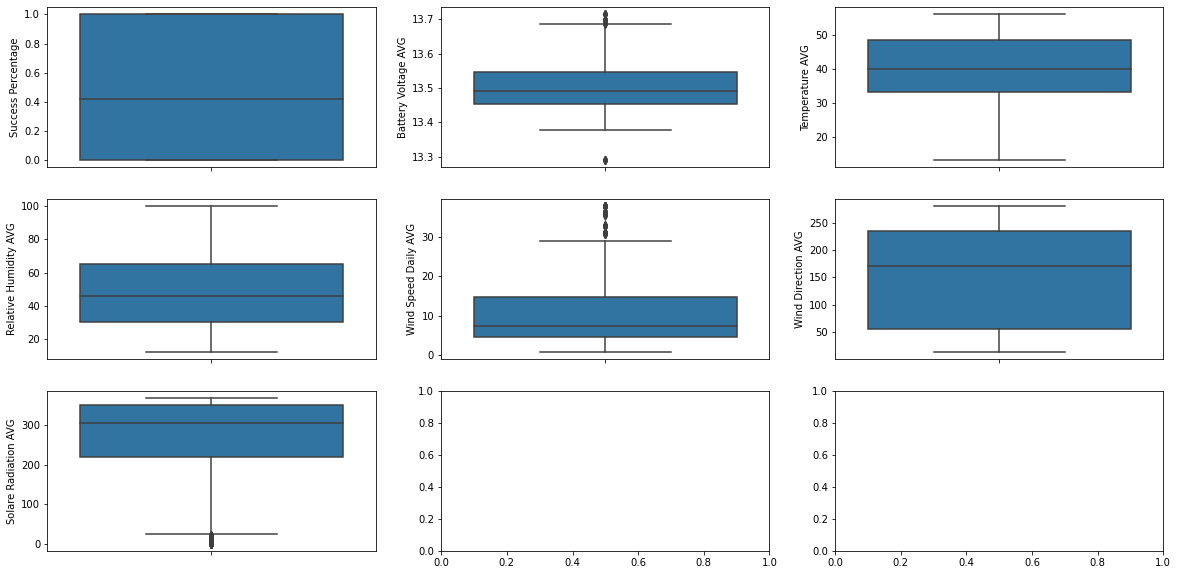

In [670]:
fig, ax =  plt.subplots(3,3,figsize=(20,10))
sns.boxplot(y=df["Success Percentage"],ax=ax[0,0])
sns.boxplot(y=df["Battery Voltage AVG"],ax=ax[0,1])
sns.boxplot(y=df["Temperature AVG"],ax=ax[0,2])
sns.boxplot(y=df["Relative Humidity AVG"],ax=ax[1,0])
sns.boxplot(y=df["Wind Speed Daily AVG"],ax=ax[1,1])
sns.boxplot(y=df["Wind Direction AVG"],ax=ax[1,2])
sns.boxplot(y=df["Solare Radiation AVG"],ax=ax[2,0])
plt.show()

#### 4.6 Merge less counted routes in one

In [671]:
df["Route"].value_counts()

Disappointment Cleaver              1289
Emmons-Winthrop                      294
Kautz Glacier                         97
Little Tahoma                         36
Gibralter Ledges                      29
Liberty RIngraham Directge            29
Fuhrers Finger                        27
glacier only - no summit attempt      25
Ingraham Direct                       24
Ptarmigan RIngraham Directge           8
Kautz Cleaver                          7
Fuhrer's Finger                        5
Tahoma Glacier                         4
Mowich Face                            3
Wilson Headwall                        2
Curtis RIngraham Directge              2
Success Cleaver                        2
Nisqually Glacier                      2
Unknown                                1
Sunset RIngraham Directge              1
Gibralter Chute                        1
Tahoma Cleaver                         1
Name: Route, dtype: int64

In [672]:
Route = pd.Series(df["Route"].value_counts())
Route_remove = Route[9:22]
Route_remove

Ptarmigan RIngraham Directge    8
Kautz Cleaver                   7
Fuhrer's Finger                 5
Tahoma Glacier                  4
Mowich Face                     3
Wilson Headwall                 2
Curtis RIngraham Directge       2
Success Cleaver                 2
Nisqually Glacier               2
Unknown                         1
Sunset RIngraham Directge       1
Gibralter Chute                 1
Tahoma Cleaver                  1
Name: Route, dtype: int64

In [673]:
for i in Route_remove.index:
    df["Route"] = np.where(df["Route"]==i,"Others",df["Route"])

In [674]:
df["Route"].value_counts()

Disappointment Cleaver              1289
Emmons-Winthrop                      294
Kautz Glacier                         97
Others                                39
Little Tahoma                         36
Liberty RIngraham Directge            29
Gibralter Ledges                      29
Fuhrers Finger                        27
glacier only - no summit attempt      25
Ingraham Direct                       24
Name: Route, dtype: int64

#### 4.7 Change route value to discrete

In [675]:
dummy = pd.get_dummies(df["Route"], drop_first=True)
df = pd.concat([dummy, df], axis=1)
df.drop("Route", axis=1, inplace=True)

In [676]:
df.drop(["Date", "Month"], axis=1, inplace=True)

### 5. Assumption Check

#### 5.1 Linearity Check - Failed

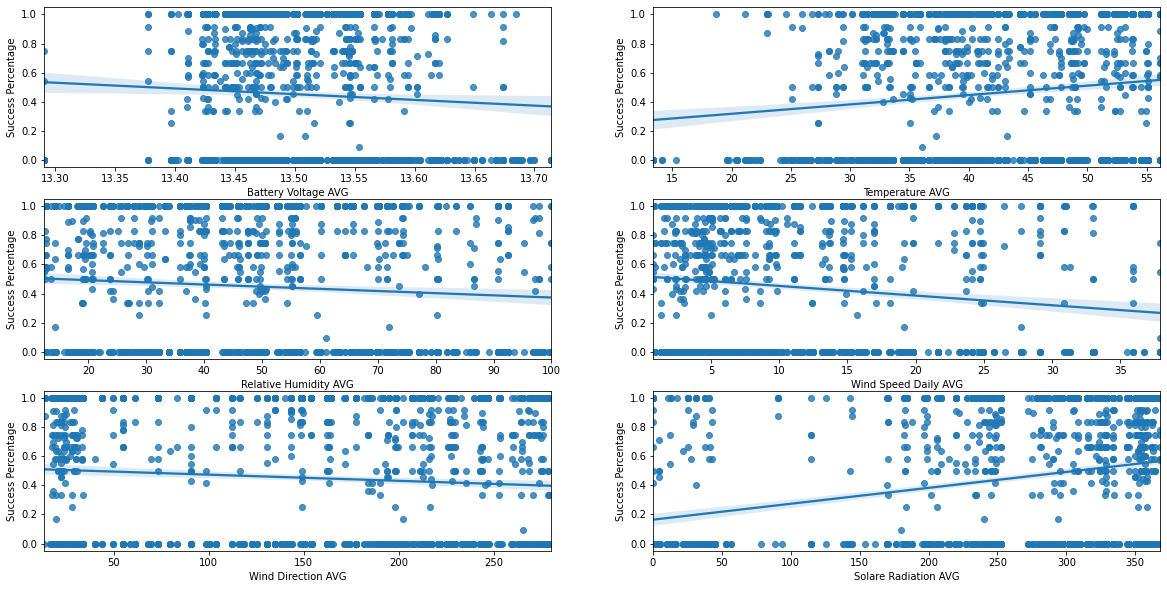

In [677]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.regplot(x='Battery Voltage AVG',y='Success Percentage',data=df,ax=ax[0,0])
sns.regplot(x='Temperature AVG',y='Success Percentage',data=df,ax=ax[0,1])
sns.regplot(x='Relative Humidity AVG',y='Success Percentage',data=df,ax=ax[1,0])
sns.regplot(x='Wind Speed Daily AVG',y='Success Percentage',data=df,ax=ax[1,1])
sns.regplot(x='Wind Direction AVG',y='Success Percentage',data=df,ax=ax[2,0])
sns.regplot(x='Solare Radiation AVG',y='Success Percentage',data=df,ax=ax[2,1])
plt.show()

#### 5.2 Normality Check - Failed

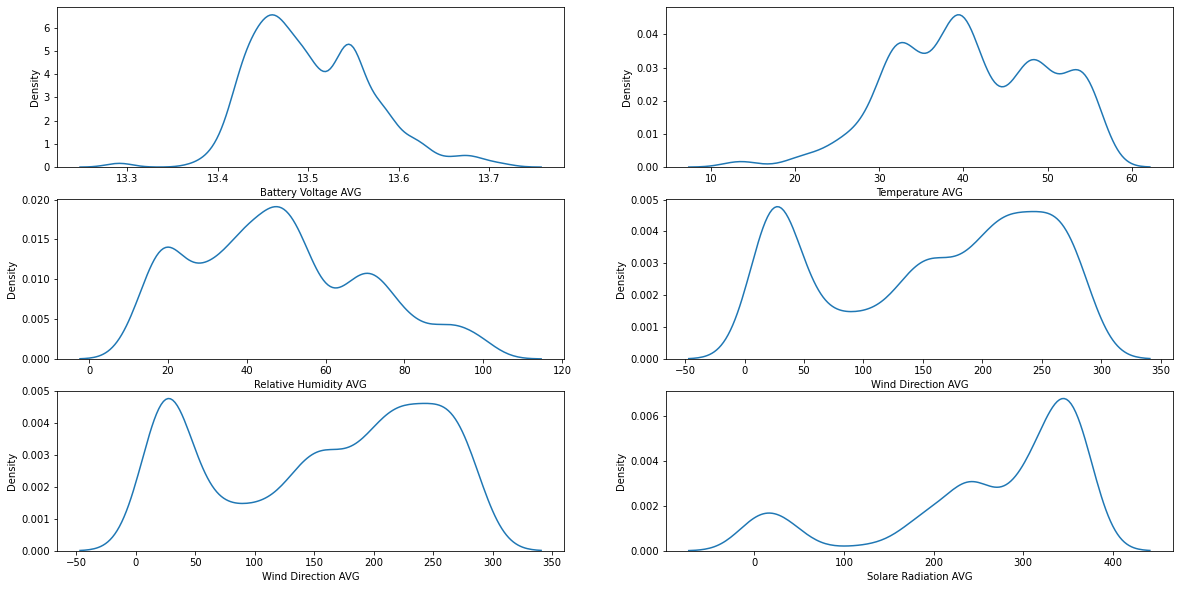

In [678]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.distplot(a=df["Battery Voltage AVG"],hist=False,ax=ax[0,0])
sns.distplot(a=df["Temperature AVG"],hist=False,ax=ax[0,1])
sns.distplot(a=df["Relative Humidity AVG"],hist=False,ax=ax[1,0])
sns.distplot(a=df["Wind Direction AVG"],hist=False,ax=ax[1,1])
sns.distplot(a=df["Wind Direction AVG"],hist=False,ax=ax[2,0])
sns.distplot(a=df["Solare Radiation AVG"],hist=False,ax=ax[2,1])
plt.show()

#### 5.3 Multicolinearity Check

Observation - (Battery Voltage AVG & Relative Humadity), (Solar Radiation AVG & Temperature AVG) are corelated

In [679]:
corr_matrix = df.corr()
corr_matrix

,Emmons-Winthrop,Fuhrers Finger,Gibralter Ledges,Ingraham Direct,Kautz Glacier,Liberty RIngraham Directge,Little Tahoma,Others,glacier only - no summit attempt,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Success Percentage
Emmons-Winthrop,1.000000,-0.051699,-0.053609,-0.048703,-0.099887,-0.053609,-0.059842,-0.062336,-0.049721,-0.022246,0.068463,-0.025224,-0.047068,-0.046288,0.154023,0.058609
Fuhrers Finger,-0.051699,1.000000,-0.015036,-0.013660,-0.028016,-0.015036,-0.016784,-0.017484,-0.013946,0.107128,-0.089928,-0.027676,0.008352,0.009761,-0.129847,-0.089254
Gibralter Ledges,-0.053609,-0.015036,1.000000,-0.014165,-0.029051,-0.015591,-0.017404,-0.018130,-0.014461,0.185135,-0.205869,-0.045433,0.031917,0.067304,-0.273350,-0.094640
Ingraham Direct,-0.048703,-0.013660,-0.014165,1.000000,-0.026393,-0.014165,-0.015812,-0.016471,-0.013138,0.147867,-0.152829,-0.012105,0.068809,0.083318,-0.215543,-0.080639
Kautz Glacier,-0.099887,-0.028016,-0.029051,-0.026393,1.000000,-0.029051,-0.032429,-0.033780,-0.026944,0.004277,0.024168,0.022856,-0.020783,0.030972,0.044387,0.027606
Liberty RIngraham Directge,-0.053609,-0.015036,-0.015591,-0.014165,-0.029051,1.000000,-0.017404,-0.018130,-0.014461,0.056781,-0.023300,0.002770,-0.043029,-0.004082,0.011659,0.008837
Little Tahoma,-0.059842,-0.016784,-0.017404,-0.015812,-0.032429,-0.017404,1.000000,-0.020238,-0.016142,0.052149,-0.030259,-0.012004,-0.039373,0.048575,-0.047345,-0.007090
Others,-0.062336,-0.017484,-0.018130,-0.016471,-0.033780,-0.018130,-0.020238,1.000000,-0.016815,0.075159,-0.076960,0.010119,0.021359,0.063555,-0.056570,-0.039836
glacier only - no summit attempt,-0.049721,-0.013946,-0.014461,-0.013138,-0.026944,-0.014461,-0.016142,-0.016815,1.000000,0.034827,-0.011859,-0.004027,-0.031284,0.069599,-0.003872,-0.093710
Battery Voltage AVG,-0.022246,0.107128,0.185135,0.147867,0.004277,0.056781,0.052149,0.075159,0.034827,1.000000,-0.671016,0.399503,0.246211,0.153834,-0.424734,-0.056464


<AxesSubplot:>

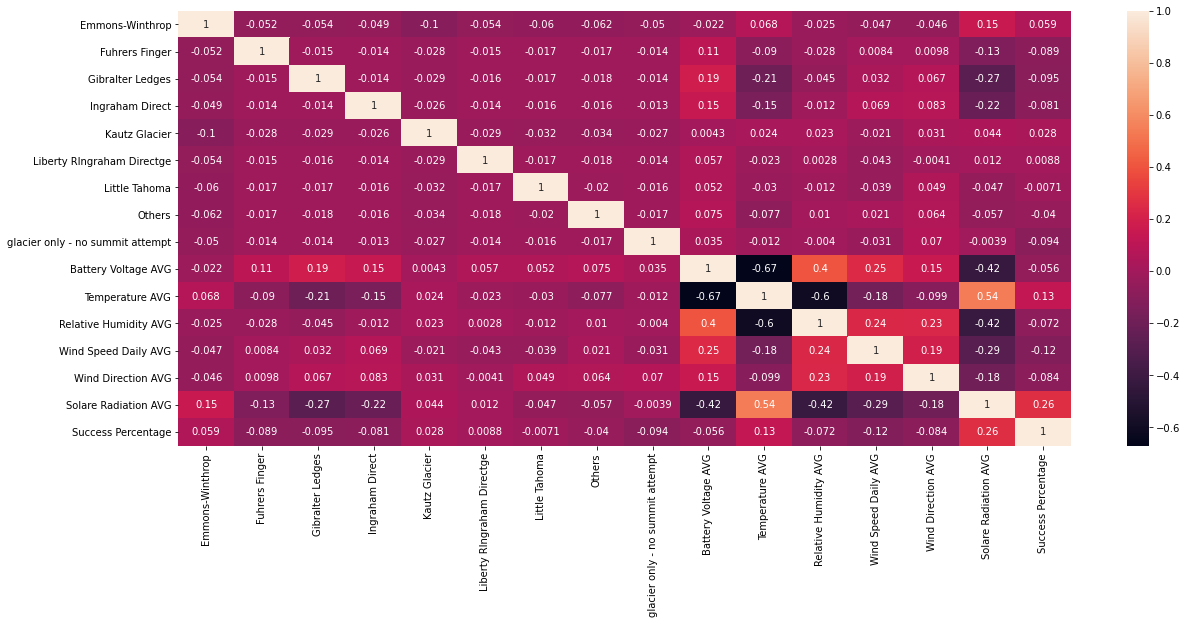

In [680]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True)

In [681]:
df.head()

,Emmons-Winthrop,Fuhrers Finger,Gibralter Ledges,Ingraham Direct,Kautz Glacier,Liberty RIngraham Directge,Little Tahoma,Others,glacier only - no summit attempt,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Success Percentage
0,0,0,0,0,0,0,0,0,0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,0.0
1,0,0,0,0,0,0,0,0,0,13.714199,31.300000,21.690708,2.245833,117.549667,93.660417,0.0
2,0,0,0,0,0,0,0,0,0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,0.0
3,0,0,0,0,0,0,1,0,0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,0.0
4,0,0,0,0,0,0,0,0,0,13.291052,38.260417,74.329167,37.913806,264.687500,27.791292,0.0


### 6. Model Building

In [682]:
X = df.drop(columns="Success Percentage",axis=1)
y = df[["Success Percentage"]]

#### 6.1 Scalling of input data

In [683]:
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=scaled_X,columns=X.columns)
scaled_X.describe()

,Emmons-Winthrop,Fuhrers Finger,Gibralter Ledges,Ingraham Direct,Kautz Glacier,Liberty RIngraham Directge,Little Tahoma,Others,glacier only - no summit attempt,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
count,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03,1.889000e+03
mean,1.293536e-15,7.656660e-17,1.656372e-15,-4.309490e-15,6.150600e-17,1.392583e-15,1.397153e-15,2.296146e-15,1.266515e-15,2.359856e-14,8.846520e-16,2.444959e-17,-2.158147e-16,-2.922196e-16,-6.354543e-16
std,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00,1.000265e+00
min,-4.293321e-01,-1.204182e-01,-1.248655e-01,-1.134400e-01,-2.326574e-01,-1.248655e-01,-1.393842e-01,-1.451933e-01,-1.158103e-01,-3.239447e+00,-3.029097e+00,-1.602867e+00,-1.143003e+00,-1.559419e+00,-2.365319e+00
25%,-4.293321e-01,-1.204182e-01,-1.248655e-01,-1.134400e-01,-2.326574e-01,-1.248655e-01,-1.393842e-01,-1.451933e-01,-1.158103e-01,-7.641817e-01,-8.143296e-01,-8.041239e-01,-7.054260e-01,-1.101415e+00,-3.733138e-01
50%,-4.293321e-01,-1.204182e-01,-1.248655e-01,-1.134400e-01,-2.326574e-01,-1.248655e-01,-1.393842e-01,-1.451933e-01,-1.158103e-01,-1.858415e-01,-7.582773e-02,-7.807289e-02,-3.626448e-01,1.770635e-01,3.904387e-01
75%,-4.293321e-01,-1.204182e-01,-1.248655e-01,-1.134400e-01,-2.326574e-01,-1.248655e-01,-1.393842e-01,-1.451933e-01,-1.158103e-01,6.530696e-01,8.737471e-01,7.811690e-01,5.208004e-01,8.783099e-01,8.189717e-01
max,2.329199e+00,8.304394e+00,8.008616e+00,8.815233e+00,4.298166e+00,8.008616e+00,7.174414e+00,6.887372e+00,8.634813e+00,3.214784e+00,1.706602e+00,2.353314e+00,3.303607e+00,1.371185e+00,9.644722e-01


#### 6.2 Model Training

In [684]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.20)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1511, 15) (1511, 1) (378, 15) (378, 1)


In [685]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

#### 6.3 Model Testing

In [686]:
pred_y = linear_model.predict(X_test)
pred_y = pd.DataFrame(data=pred_y,columns=["Success Percentage"])
pred_y.head()

,Success Percentage
0,0.538125
1,0.459084
2,0.579672
3,0.413955
4,0.535553


In [687]:
y_test.reset_index(inplace=True,drop=True)
y_test.head()

,Success Percentage
0,0.000000
1,0.000000
2,0.750000
3,1.000000
4,0.666667


In [688]:
error = y_test - pred_y1
error

,Success Percentage
0,-0.431655
1,-0.536114
2,0.634581
3,0.443203
4,0.118697
...,...
373,-0.480573
374,-0.506890
375,-0.506890
376,-0.101049


### 7. Model Evaluation

In [689]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [690]:
mean_absolute_error(y_test,pred_y)

0.4088365811069141

In [691]:
mean_squared_error(y_test,pred_y)

0.1982828865804673

#### As a conclusion, this model is quite accaptable because mean_squared error is near to zero.
#### Maybe we can improve with the more classification of climbers (veteran or rookie) and their experience.